In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [44]:
rul = pd.read_csv("data/RUL_FD001.txt", header=None).values.reshape(-1)
df_train = pd.read_csv("data/train_FD001.txt", sep=' ', header=None)
df_train = df_train.drop(df_train.columns[-2:], axis=1)
df_test = pd.read_csv("data/test_FD001.txt", sep=' ', header=None)
df_test = df_test.drop(df_test.columns[-2:], axis=1)

In [45]:
column_selected = df_train[df_train.iloc[:, 0] == 1].std() > 1e-10
column_selected[0:5] = True

In [46]:
df_train = df_train.loc[:, column_selected]
df_test = df_test.loc[:, column_selected]

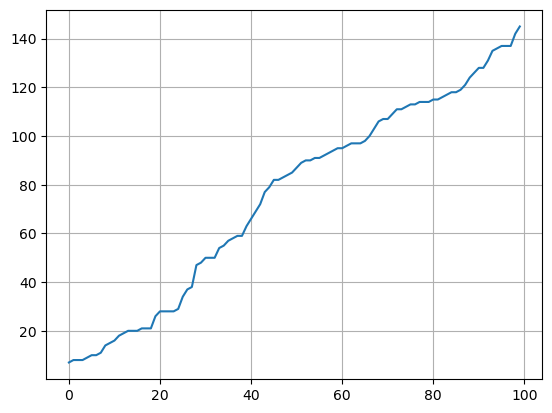

In [47]:
plt.plot(np.sort(rul))
plt.grid()

In [48]:
scaler = MinMaxScaler(feature_range=(-1, 1))
data_train = scaler.fit_transform(df_train.iloc[:, 5:])
data_test = scaler.fit_transform(df_test.iloc[:, 5:])

In [49]:
window_size = 30
y_cap = 130
train_X = []
train_no = []
train_label = []

for i in range(1, 101):
    data_unit = data_train[df_train.iloc[:, 0] == i]
    train_X_unit = []
    train_no_unit = []

    for j in range(window_size-1):
        X_pad = np.zeros([window_size, data_unit.shape[-1]])
        X_pad[-j-1:, :] = data_unit[:j+1, :]
        train_X_unit.append(X_pad)
        train_no_unit.append(i)

    for j in range(len(data_unit)-window_size+1):
        train_X_unit.append(data_unit[j:j+window_size, :])
        train_no_unit.append(i)

    rul_unit = rul[i-1]
    y_unit = np.arange(rul_unit, 0, -1) - 1
    y_unit = y_unit[:min(rul_unit, len(data_unit))] # RUL of No.39 is larger than duration
    y_unit[y_unit>y_cap] = y_cap

    train_X += train_X_unit[:rul_unit]
    train_no += train_no_unit[:rul_unit]

    train_label += list(y_unit)

    #print((i, len(train_label), len(train_X), rul_unit, len(data_unit)))

train_X = np.array(train_X)
train_no = np.array(train_no)
train_label = np.array(train_label)

In [53]:
test_X = []
test_label = []
test_no = []

for i in range(1, 101):
    data_unit = data_test[df_test.iloc[:, 0] == i]
    test_X_unit = []
    test_no_unit = []

    for j in range(window_size-1):
        X_pad = np.zeros([window_size, data_unit.shape[-1]])
        X_pad[-j-1:, :] = data_unit[:j+1, :]
        test_X_unit.append(X_pad)
        test_no_unit.append(i)

    for j in range(len(data_unit)-window_size+1):
        test_X_unit.append(data_unit[j:j+window_size, :])
        test_no_unit.append(i)

    rul_unit = len(data_unit)
    y_unit = np.arange(rul_unit, 0, -1) - 1
    y_unit[y_unit>y_cap] = y_cap

    test_X += test_X_unit
    test_no += test_no_unit
    test_label += list(y_unit)

test_X = np.array(test_X)
test_no = np.array(test_no)
test_label = np.array(test_label)

In [54]:
len(test_X)

13096

In [56]:
test_no

array([  1,   1,   1, ..., 100, 100, 100])

In [13]:
# window_size = 30
# train_X = []
# train_unit = []
# train_label = []


# for i in range(1, 101):
#     data_unit = data_train[df_train.iloc[:, 0] == i]
#     for j in range(len(data_unit)-window_size):
#         train_X.append(data_unit[i:i+window_size, :])
#         train_unit.append(i)

#     y_unit = np.arange(rul[i-1]-window_size-1, rul[i-1]-len(data_unit)-1, -1)
#     y_unit[y_unit<0.] = 0.

#     train_label += list(y_unit)

# train_X = np.array(train_X)
# train_unit = np.array(train_unit)
# train_label = np.array(train_label)

RUL is smaller than window